## 1DCNN first type

In [24]:
%run clearence.py

In [25]:
%run datapreparation.py

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
def build_model_aware_CNN(kernel_size=5, num_classes=4):  # Add num_classes as a parameter
    FDCNNmodel = tf.keras.Sequential()
    FDCNNmodel.add(tf.keras.layers.InputLayer(input_shape=(15, 6)))
    FDCNNmodel.add(Conv1D(24, kernel_size=(kernel_size), activation='relu', kernel_initializer="glorot_uniform"))
    FDCNNmodel.add(Conv1D(48, kernel_size=(kernel_size), activation='relu', kernel_initializer="glorot_uniform"))
    FDCNNmodel.add(Conv1D(96, kernel_size=(kernel_size), activation='relu', kernel_initializer="glorot_uniform"))
    FDCNNmodel.add(MaxPooling1D(pool_size=(2)))
    FDCNNmodel.add(TimeDistributed(Dropout(rate=0.7)))
    FDCNNmodel.add(Flatten())
    FDCNNmodel.add(Dense(32, activation='relu', kernel_initializer="glorot_uniform"))
    FDCNNmodel.add(Dense(num_classes, kernel_initializer="glorot_uniform"))  # Change number of units to num_classes
    FDCNNmodel.add(Activation('softmax'))  # Change activation function to 'softmax'
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    FDCNNmodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Change loss function to 'categorical_crossentropy'
    
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    return FDCNNmodel, early_stopping

In [28]:

# Build the model
FDCNNmodel, early_stopping = build_model_aware_CNN() 

# Train the model
history = FDCNNmodel.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=64, callbacks=[early_stopping])

# Evaluate the model on training set
train_loss, train_accuracy = FDCNNmodel.evaluate(X_train, y_train_encoded)
print("Model Training Accuracy:", train_accuracy)
print("Model Training Loss:", train_loss)

# Evaluate the model on test set
test_loss, test_accuracy = FDCNNmodel.evaluate(X_test, y_test_encoded)
print("\033[92m\033[1mTest Accuracy:\033[0m", "\033[92m" + str(test_accuracy) + "\033[0m")
print("Model Test Loss:", test_loss)

c:\Users\Javie_nzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.2025 - loss: 1.4318 - val_accuracy: 0.5099 - val_loss: 1.3508
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3573 - loss: 1.3679 - val_accuracy: 0.5865 - val_loss: 1.3227
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4054 - loss: 1.3511 - val_accuracy: 0.6123 - val_loss: 1.2928
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4395 - loss: 1.3142 - val_accuracy: 0.6322 - val_loss: 1.2538
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5050 - loss: 1.2547 - val_accuracy: 0.6382 - val_loss: 1.2003
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5094 - loss: 1.2197 - val_accuracy: 0.6322 - val_loss: 1.1402
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5422 - loss: 1.1500 - val_accuracy: 0.6362 - val_loss: 1.0862
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5529 - loss: 1.1220 - val_accuracy: 0.

In [34]:
y_pred = FDCNNmodel.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


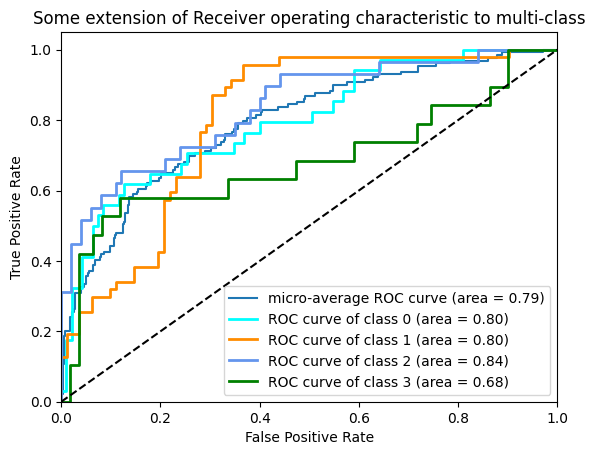

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

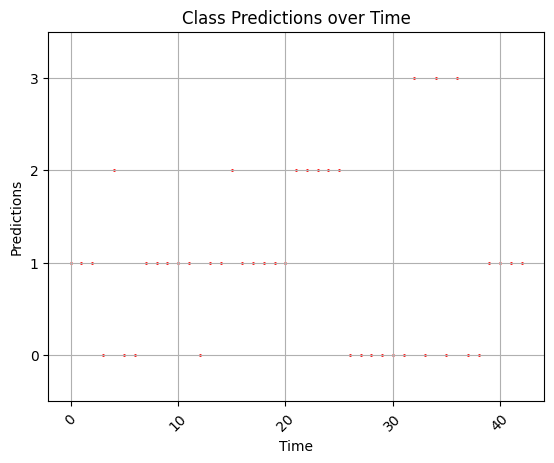

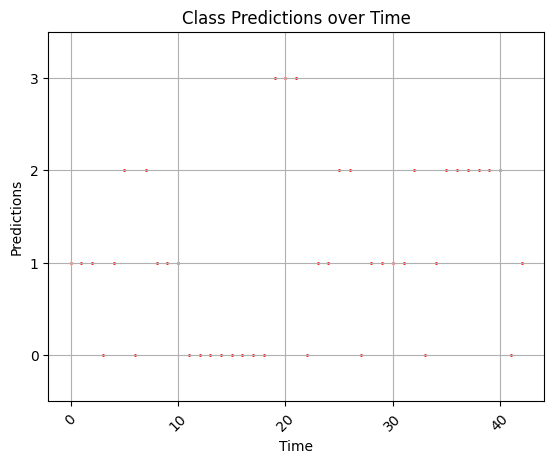

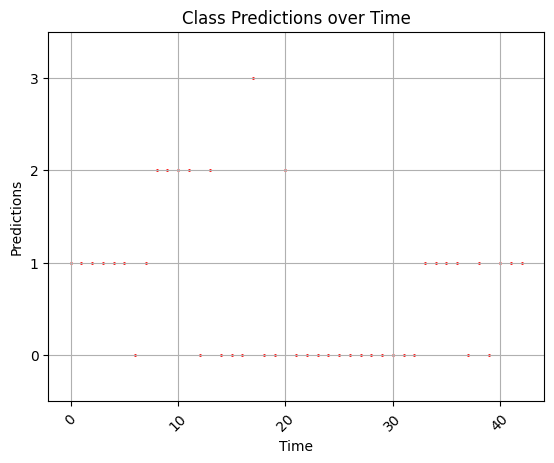

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_pred):
    class_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    plt.scatter(np.arange(len(class_pred)), class_pred, s=1, c='red', alpha=1)
    plt.xlabel('Time')
    plt.ylabel('Predictions')
    plt.title('Class Predictions over Time')
    plt.xticks(rotation=45)
    plt.yticks([0, 1, 2, 3])  # Set y-axis ticks to show only 0, 1, 2, and 3
    plt.ylim(-0.5, 3.5)  # Set y-axis limits to center the points
    plt.grid(True)
    plt.show()

# Assuming predictions_FC is a list of arrays where each array represents predictions for a different user
predictions_FC = [y_pred]  # Replace y_pred with your actual predictions

# Calculate the length of each chunk (assuming 3 testing extracts)
len_pred = len(predictions_FC[0]) // 3

# Split predictions into chunks for each user
predictions_chunks = [predictions_FC[0][i:i + len_pred] for i in range(0, len(predictions_FC[0]), len_pred)]

# Plot class predictions for each user separately
for chunk in predictions_chunks:
    plot_predictions(chunk)

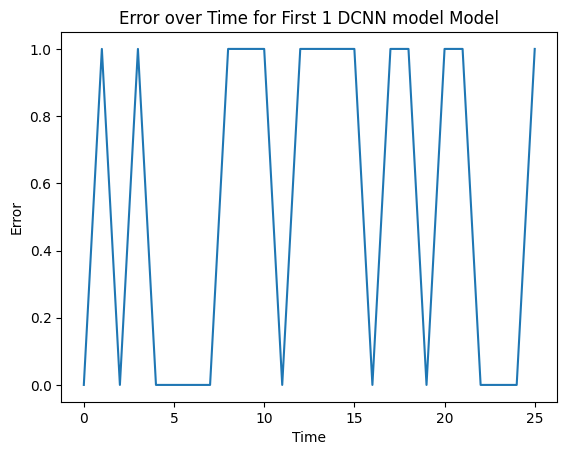

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_errors(predictions_FC, y_test):
    errors = []

    for user_predictions in predictions_FC:
        y_user_test = y_test[:len(user_predictions)]
        class_pred = np.argmax(user_predictions, axis=1)  # Convert predictions to class labels
        errors.append(class_pred != y_user_test)
        y_test = y_test[len(user_predictions):]

    error = np.mean(errors, axis=0)
    return error

errors_lstm = calculate_errors(predictions_FC, y_test)

plt.plot(errors_lstm[::5])  # Adjust the step size here
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Error over Time for First 1 DCNN model Model')
plt.show()